In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

In [2]:
# Constants
SAMPLES_PER_YEAR = 12 * 24 * 365
LESS_WINDY_IDS = [18880, 18881, 18995, 18997, 18998, 18999, 19110, 19111, 19112, 19113]
MORE_WINDY_IDS = [23769, 23770, 23771, 23903, 23904, 23905, 23906, 23907, 23908, 24046, 24047,
                  24048, 24049, 24050, 24051, 24052, 24053, 24177, 24178, 24179, 24180, 24181]
YEARS = [2007, 2008, 2009]

In [3]:
def concat_csv(folder_from, file_to, site_ids):

    array = np.empty(shape=(0, SAMPLES_PER_YEAR * len(YEARS)))  # size of 3 years of data, with 5min resolution
    
    # For each file in directory folder_from.
    for site_id in site_ids:
        data_year = np.empty(shape=(0,))
        for year in YEARS:
            f = str(site_id) + '-' + str(year) + '.csv'
            filename = os.path.join(folder_from, f)
            print(filename)
            
            # Select only values of interest
            df = pd.read_csv(filename).iloc[3:, 5]
            values = df.values.astype('float')
            
            # Normalize to get values in [0, 1]
            values = values / np.max(values)
            
            # Concatenate only if profile is not all zeros
            if (np.sum(values) > 0.):
                data_year = np.concatenate((data_year, values))
        
        array = np.vstack((array, data_year))

    np.savetxt(file_to, array, delimiter=',')
    return array

def get_16mw(folder_from, site_ids):
    
    site_ids_16mw = []
    
    # For each file in directory folder_from.
    for site_id in site_ids:
        for year in YEARS:
            f = str(site_id) + '-' + str(year) + '.csv'
            filename = os.path.join(folder_from, f)
            #print(filename)
            
            # Select only values of interest
            df = pd.read_csv(filename).iloc[3:, 5]
            values = df.values.astype('float')
            
            # Store max value in time series
            if np.max(values) == 16:
                site_ids_16mw.append(site_id)
    return site_ids_16mw

In [4]:
folder_from = '/Volumes/Eluteng/cs159_data/less_windy/'
mw16_less_windy = get_16mw(folder_from, LESS_WINDY_IDS)
print('Less windy:', mw16_less_windy)

# folder_from2 = '/Volumes/Eluteng/cs159_data/more_windy/'
# mw16_more_windy = get_16mw(folder_from2, MORE_WINDY_IDS)
# print('\n\nMore: windy:', mw16_more_windy)

Less windy: [18880, 18880, 18880, 18881, 18881, 18881, 18995, 18995, 18995, 18997, 18997, 18997, 19110, 19110, 19110, 19111, 19111, 19111, 19112, 19112, 19112, 19113, 19113, 19113]


In [5]:
folder_from = '/Volumes/Eluteng/cs159_data/less_windy/'
file_to = 'generative_models/data/less_windy.csv'
less_windy_array = concat_csv(folder_from, file_to, LESS_WINDY_IDS)

# folder_from2 = '/Volumes/Eluteng/cs159_data/more_windy/'
# file_to2 = 'generative_models/data/more_windy.csv'
# more_windy_array =  concat_csv(folder_from2, file_to2, MORE_WINDY_IDS)

/Volumes/Eluteng/cs159_data/less_windy/18880-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18880-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18880-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2009.csv
/Volumes/Eluteng/cs159_data/

In [29]:
print(less_windy_array.shape)

(10, 315360)


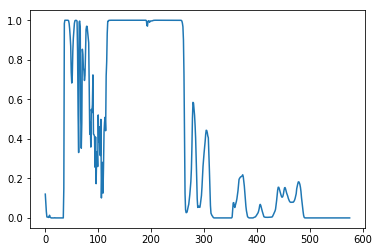

In [23]:
profile = less_windy_array[1, 2*576:3*576]
plt.plot(profile)

In [9]:
24*24

576

In [13]:
def concat_solar(folder_from):
    
    filenames = os.listdir(folder_from)
    
    X = None
    
    # For each file in directory folder_from.
    for file in filenames:
        print(file)
            
        # Select only values of interest
        df = pd.read_csv(filename)
        values = df.values[:, 1].astype('float')
        
        if X is None:
            X = values.reshape((1, values.size))
        else:
            X = np.vstack((X, values))
            
    return X

folder = 'generative_models/data/solar_data_2006/'
file_to = 'generative_models/data/solar_2006.csv'
X_solar = concat_solar(folder)

np.savetxt(file_to, X_solar, delimiter=',')

Actual_33.95_-118.15_2006_DPV_74MW_5_Min.csv
Actual_33.85_-118.25_2006_DPV_74MW_5_Min.csv
Actual_33.85_-117.95_2006_DPV_74MW_5_Min.csv
Actual_33.95_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.85_2006_DPV_74MW_5_Min.csv
Actual_34.05_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.75_-118.35_2006_DPV_74MW_5_Min.csv
Actual_33.55_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.75_-118.25_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.95_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.55_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.85_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.95_-118.45_2006_DPV_74MW_5_Min.csv
Actual_33.95_-118.05_2006_DPV_74MW_5_Min.csv
Actual_33.85_-118.35_2006_DPV_74MW_5_Min.csv
Actual_33.95_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.45_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.75_2006_DPV_74MW_5_Min.csv
Actual_34.05_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.

In [12]:
with open(file_to, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]
rows = np.array(rows, dtype=float)

print(rows.shape)

(32, 105120)


In [15]:
np.max(rows)

65.7

### Pre-process load data

In [29]:
def process_file(filename, zone_names):
    # Load as pandas df
    df = pd.read_csv(csvfile)
    
    # Sort by starting time
    df = df.sort_values(by=['INTERVALSTARTTIME_GMT'])
    
    # Store time-series in number_of_locations x (24x30 = 1 month) array
    monthly_time_series = []
    
    # Iterate over each location
    for zone in zone_names:
        # Select sub-dataframe for specific zone only.
        df_zone = df[df.TAC_ZONE_NAME == zone]
        
        # Select data to start at 00:00 at end at 00:00.
        df_zone = df_zone.iloc[16:-8, :]
        print('Zone: ', zone)
        print('First time step: ', df_zone.iloc[0, 0])
        print('Last time step: ', df_zone.iloc[-1, 0])
        
        values = df_zone.MW.values
        
        # Print mean value for this month
        print(f'Average load (MW): {np.mean(values)}')        
        
        # Get in range [0, 1]
        values = (values - np.min(values)) / (np.max(values) - np.min(values))
        
        # Print mean value after normalizing
        print(f'Average load after normalizing in [0, 1]: {np.mean(values)}')
        print('')
        
        # Store load time-series
        monthly_time_series.append(values)
    
    return np.array(monthly_time_series)

1_2017
Zone:  TAC_ECNTR
First time step:  2017-01-02T00:00:00-00:00
Last time step:  2017-01-31T23:00:00-00:00
Average load (MW): 10897.077694444444
Average load after normalizing in [0, 1]: 0.49350808465600865

Zone:  TAC_SOUTH
First time step:  2017-01-02T00:00:00-00:00
Last time step:  2017-01-31T23:00:00-00:00
Average load (MW): 2211.828222222222
Average load after normalizing in [0, 1]: 0.4341784763606146

Zone:  TAC_NORTH
First time step:  2017-01-02T00:00:00-00:00
Last time step:  2017-01-31T23:00:00-00:00
Average load (MW): 11073.892694444445
Average load after normalizing in [0, 1]: 0.4557711950710269

Zone:  TAC_NCNTR
First time step:  2017-01-02T00:00:00-00:00
Last time step:  2017-01-31T23:00:00-00:00
Average load (MW): 70.523125
Average load after normalizing in [0, 1]: 0.383135012322859

Zone:  Caiso_Totals
First time step:  2017-01-02T00:00:00-00:00
Last time step:  2017-01-31T23:00:00-00:00
Average load (MW): 24253.32173611111
Average load after normalizing in [0, 1]: 0

FileNotFoundError: [Errno 2] File b'/Users/robin/Desktop/load_data/load_data/7_20178_2018.csv' does not exist: b'/Users/robin/Desktop/load_data/load_data/7_20178_2018.csv'

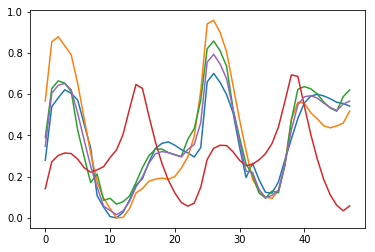

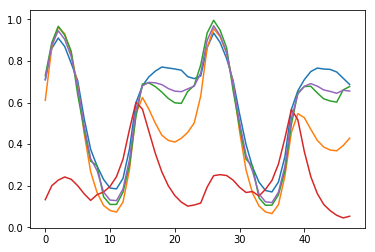

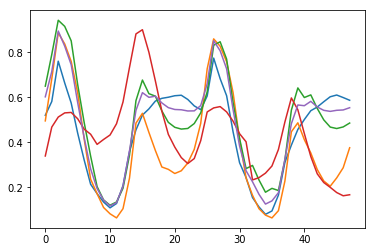

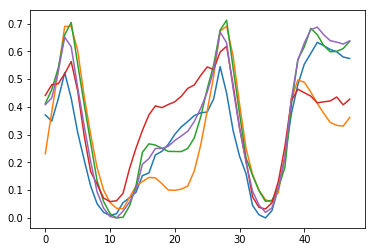

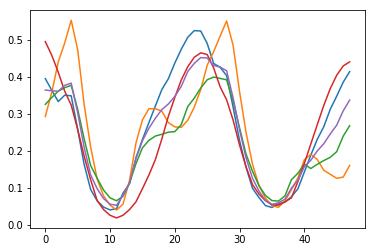

In [38]:
folder_load = '~/Desktop/load_data/load_data/'
filenames = ['1_2017', '2_2017', '3_2017', '4_2017', '6_2017', '7_2017',
             '8_2018', '9_2017', '10_2017', '11_2017', '12_2017']
zone_names = ['TAC_ECNTR', 'TAC_SOUTH', 'TAC_NORTH', 'TAC_NCNTR', 'Caiso_Totals']
for filename in filenames:
    print(filename)
    csvfile = folder_load + filename + '.csv'
    month_data = process_file(csvfile, zone_names)
    
    plt.figure()
    for s in month_data[:,  :48]:
        plt.plot(s)


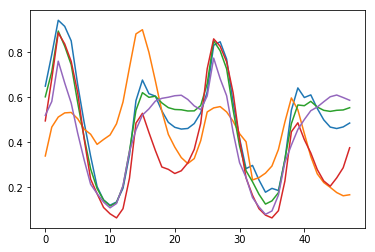

In [37]:
csvfile = folder_load + '5_2018' + '.csv'

# Load as pandas df
df = pd.read_csv(csvfile)

# Sort by starting time
df = df.sort_values(by=['INTERVALSTARTTIME_GMT'])
df


# # Iterate over each location
# for zone in zone_names:
#     # Select sub-dataframe for specific zone only.
#     df_zone = df[df.TAC_ZONE_NAME == zone]
    
#     print(df_zone.shape)

#     # Select data to start at 00:00 at end at 00:00.
#     df_zone = df_zone.iloc[16:-8, :]
#     print('Zone: ', zone)
#     print('First time step: ', df_zone.iloc[0, 0])
#     print('Last time step: ', df_zone.iloc[-1, 0])

#     values = df_zone.MW.values

#     # Print mean value for this month
#     print(f'Average load (MW): {np.mean(values)}')        

#     # Get in range [0, 1]
#     values = (values - np.min(values)) / (np.max(values) - np.min(values))

#     # Print mean value after normalizing
#     print(f'Average load after normalizing in [0, 1]: {np.mean(values)}')
#     print('')

#     # Store load time-series
#     monthly_time_series.append(values)


,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,SLRS_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_ZONE_NAME,SCHEDULE,XML_DATA_ITEM,POS,MW,GROUP
125,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,LOAD,2018-05-02,1,0,DAM,TAC_SOUTH,Load,TOT_LOAD_MW,8,1792.79,6
42,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,LOAD,2018-05-02,1,0,DAM,NONTAC,Load,TOT_LOAD_MW,8,0.62,2
6,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,ALL,2018-05-02,1,0,DAM,Caiso_Totals,Load,ISO_TOT_LOAD_MW,4,20787.73,1
68,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,LOAD,2018-05-02,1,0,DAM,TAC_ECNTR,Load,TOT_LOAD_MW,8,9153.10,3
103,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,LOAD,2018-05-02,1,0,DAM,TAC_NORTH,Load,TOT_LOAD_MW,8,9798.66,5
72,2018-05-02T07:00:00-00:00,2018-05-02T08:00:00-00:00,LOAD,2018-05-02,1,0,DAM,TAC_NCNTR,Load,TOT_LOAD_MW,8,42.56,4
33,2018-05-02T08:00:00-00:00,2018-05-02T09:00:00-00:00,LOAD,2018-05-02,2,0,DAM,NONTAC,Load,TOT_LOAD_MW,8,0.63,2
65,2018-05-02T08:00:00-00:00,2018-05-02T09:00:00-00:00,LOAD,2018-05-02,2,0,DAM,TAC_ECNTR,Load,TOT_LOAD_MW,8,8762.68,3
7,2018-05-02T08:00:00-00:00,2018-05-02T09:00:00-00:00,ALL,2018-05-02,2,0,DAM,Caiso_Totals,Load,ISO_TOT_LOAD_MW,4,19685.44,1
107,2018-05-02T08:00:00-00:00,2018-05-02T09:00:00-00:00,LOAD,2018-05-02,2,0,DAM,TAC_NORTH,Load,TOT_LOAD_MW,8,9161.64,5


In [64]:
df_zone.INTERVALSTARTTIME_GMT == '2017-01-02T00:00:00-00:00']

array([['2017-01-02T00:00:00-00:00', '2017-01-02T01:00:00-00:00', 'LOAD',
        '2017-01-01', 17, 0, 'DAM', 'TAC_ECNTR', 'Load', 'TOT_LOAD_MW',
        8, 9707.03, 2]], dtype=object)

In [3]:
a = np.array([[1,2,3], [4,5,6]])
b = []
for x in a:
    b.append(x)

array([[1, 2, 3],
       [4, 5, 6]])